# SNR & Eccentricity vs. Confidence that ecc!=0

Simona Miller, LIGO SURF 2018 (Last edited: August 7, 2018)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from pycbc import psd as pypsd
from pycbc.waveform.generator import FDomainDetFrameGenerator, FDomainCBCGenerator
from pycbc import inference
from pycbc.rate import confidence_interval_min_width as CI

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=18) 
rc('ytick', labelsize=18)

## Global Variables, Waveform Generator, & PSD 

In [3]:
# Global variables
seglen = 10
sample_rate = 2048
N = seglen*sample_rate/2+1
fmin = 20.

mass, tsig, ra, dec, pol = 20., 3.1, 1.37, -1.26, 2.76

true_ecc = np.arange(0.001,0.1,0.001)

de = 0.0005
ecc_range = np.arange(0.0, 0.15, de)

snr_range = np.arange(5,100,5)



# Waveform generator
generator = FDomainDetFrameGenerator(FDomainCBCGenerator, 
                                     0., 
                                     variable_args=['eccentricity', 'distance'], 
                                     detectors=['H1', 'L1'], 
                                     delta_f=1./seglen, 
                                     f_lower=fmin, 
                                     approximant='EccentricFD', 
                                     mass1 = mass, 
                                     mass2 = mass,
                                     tc=tsig, 
                                     ra=ra, 
                                     dec=dec, 
                                     polarization=pol)

# PSD
psd = pypsd.analytical.aLIGODesignSensitivityP1200087(N, 1./seglen, 20.)
psds = {'H1': psd, 'L1': psd}

## Necessary Helper Functions

In [4]:
def SNRtoDistance(SNR, ecc, mass, psd=psd, f_lower=fmin):

    data0 = generator.generate(eccentricity=ecc, mass1=mass, mass2=mass, distance=1)
    
    likelihood_eval = inference.GaussianLikelihood(['eccentricity'],
                                                       generator, data0, fmin, psds=psds, return_meta=False)
    SNR0 = likelihood_eval.snr()
        
    distance = int(float(SNR0)/SNR)
    
    return distance

In [5]:
def Normalize(lnlikelihood_dist, de): 
    
    lnlik = [x-max(lnlikelihood_dist)+20 for x in lnlikelihood_dist]
    
    norm_const = 1.0/(np.sum(np.exp(lnlik[:]))*de)
    
    norm = [norm_const*np.exp(x) for x in lnlik]
 
    return norm 

In [6]:
# Returns the confidence level at which x!=0
# **Assuming first element in data corresponds to x=0**

def confidence_not_zero(data, dx):
    z = data[0]
    
    data_s = sorted(data, reverse=True)
    idx = data_s.index(z)
    
    confidence = 0
    for d in data_s[:idx]: 
        confidence+=(d*dx)

    return confidence  

## Confidence!

In [7]:
confidence = {}

for SNR in snr_range:
    for e0 in true_ecc:
        
        dist = SNRtoDistance(SNR, e0, mass)

        signal = generator.generate(eccentricity=e0, distance=dist)
        
        likelihood_eval = inference.GaussianLikelihood(['eccentricity'],
                                                       generator, signal, fmin, psds=psds, return_meta=False)
        
        lnlik = []
        for e in ecc_range:    
            lnlik.append(likelihood_eval.loglr(eccentricity=e))
        
        norm = Normalize(lnlik,de)
        print 'Generated distribution for SNR={}, e0={}'.format(SNR,e0)
            
        confidence[(SNR, e0)] = confidence_not_zero(norm,de)
        print 'Calculated confidence that e!=0 for SNR={}, e0={}'.format(SNR,e0)
        

Generated distribution for SNR=5, e0=0.001
Calculated confidence that e!=0 for SNR=5, e0=0.001
Generated distribution for SNR=5, e0=0.002
Calculated confidence that e!=0 for SNR=5, e0=0.002
Generated distribution for SNR=5, e0=0.003
Calculated confidence that e!=0 for SNR=5, e0=0.003
Generated distribution for SNR=5, e0=0.004
Calculated confidence that e!=0 for SNR=5, e0=0.004
Generated distribution for SNR=5, e0=0.005
Calculated confidence that e!=0 for SNR=5, e0=0.005
Generated distribution for SNR=5, e0=0.006
Calculated confidence that e!=0 for SNR=5, e0=0.006
Generated distribution for SNR=5, e0=0.007
Calculated confidence that e!=0 for SNR=5, e0=0.007
Generated distribution for SNR=5, e0=0.008
Calculated confidence that e!=0 for SNR=5, e0=0.008
Generated distribution for SNR=5, e0=0.009
Calculated confidence that e!=0 for SNR=5, e0=0.009
Generated distribution for SNR=5, e0=0.01
Calculated confidence that e!=0 for SNR=5, e0=0.01
Generated distribution for SNR=5, e0=0.011
Calculate

Generated distribution for SNR=5, e0=0.088
Calculated confidence that e!=0 for SNR=5, e0=0.088
Generated distribution for SNR=5, e0=0.089
Calculated confidence that e!=0 for SNR=5, e0=0.089
Generated distribution for SNR=5, e0=0.09
Calculated confidence that e!=0 for SNR=5, e0=0.09
Generated distribution for SNR=5, e0=0.091
Calculated confidence that e!=0 for SNR=5, e0=0.091
Generated distribution for SNR=5, e0=0.092
Calculated confidence that e!=0 for SNR=5, e0=0.092
Generated distribution for SNR=5, e0=0.093
Calculated confidence that e!=0 for SNR=5, e0=0.093
Generated distribution for SNR=5, e0=0.094
Calculated confidence that e!=0 for SNR=5, e0=0.094
Generated distribution for SNR=5, e0=0.095
Calculated confidence that e!=0 for SNR=5, e0=0.095
Generated distribution for SNR=5, e0=0.096
Calculated confidence that e!=0 for SNR=5, e0=0.096
Generated distribution for SNR=5, e0=0.097
Calculated confidence that e!=0 for SNR=5, e0=0.097
Generated distribution for SNR=5, e0=0.098
Calculate

Generated distribution for SNR=10, e0=0.074
Calculated confidence that e!=0 for SNR=10, e0=0.074
Generated distribution for SNR=10, e0=0.075
Calculated confidence that e!=0 for SNR=10, e0=0.075
Generated distribution for SNR=10, e0=0.076
Calculated confidence that e!=0 for SNR=10, e0=0.076
Generated distribution for SNR=10, e0=0.077
Calculated confidence that e!=0 for SNR=10, e0=0.077
Generated distribution for SNR=10, e0=0.078
Calculated confidence that e!=0 for SNR=10, e0=0.078
Generated distribution for SNR=10, e0=0.079
Calculated confidence that e!=0 for SNR=10, e0=0.079
Generated distribution for SNR=10, e0=0.08
Calculated confidence that e!=0 for SNR=10, e0=0.08
Generated distribution for SNR=10, e0=0.081
Calculated confidence that e!=0 for SNR=10, e0=0.081
Generated distribution for SNR=10, e0=0.082
Calculated confidence that e!=0 for SNR=10, e0=0.082
Generated distribution for SNR=10, e0=0.083
Calculated confidence that e!=0 for SNR=10, e0=0.083
Generated distribution for SNR=1

Generated distribution for SNR=15, e0=0.06
Calculated confidence that e!=0 for SNR=15, e0=0.06
Generated distribution for SNR=15, e0=0.061
Calculated confidence that e!=0 for SNR=15, e0=0.061
Generated distribution for SNR=15, e0=0.062
Calculated confidence that e!=0 for SNR=15, e0=0.062
Generated distribution for SNR=15, e0=0.063
Calculated confidence that e!=0 for SNR=15, e0=0.063
Generated distribution for SNR=15, e0=0.064
Calculated confidence that e!=0 for SNR=15, e0=0.064
Generated distribution for SNR=15, e0=0.065
Calculated confidence that e!=0 for SNR=15, e0=0.065
Generated distribution for SNR=15, e0=0.066
Calculated confidence that e!=0 for SNR=15, e0=0.066
Generated distribution for SNR=15, e0=0.067
Calculated confidence that e!=0 for SNR=15, e0=0.067
Generated distribution for SNR=15, e0=0.068
Calculated confidence that e!=0 for SNR=15, e0=0.068
Generated distribution for SNR=15, e0=0.069
Calculated confidence that e!=0 for SNR=15, e0=0.069
Generated distribution for SNR=1

Generated distribution for SNR=20, e0=0.046
Calculated confidence that e!=0 for SNR=20, e0=0.046
Generated distribution for SNR=20, e0=0.047
Calculated confidence that e!=0 for SNR=20, e0=0.047
Generated distribution for SNR=20, e0=0.048
Calculated confidence that e!=0 for SNR=20, e0=0.048
Generated distribution for SNR=20, e0=0.049
Calculated confidence that e!=0 for SNR=20, e0=0.049
Generated distribution for SNR=20, e0=0.05
Calculated confidence that e!=0 for SNR=20, e0=0.05
Generated distribution for SNR=20, e0=0.051
Calculated confidence that e!=0 for SNR=20, e0=0.051
Generated distribution for SNR=20, e0=0.052
Calculated confidence that e!=0 for SNR=20, e0=0.052
Generated distribution for SNR=20, e0=0.053
Calculated confidence that e!=0 for SNR=20, e0=0.053
Generated distribution for SNR=20, e0=0.054
Calculated confidence that e!=0 for SNR=20, e0=0.054
Generated distribution for SNR=20, e0=0.055
Calculated confidence that e!=0 for SNR=20, e0=0.055
Generated distribution for SNR=2

Generated distribution for SNR=25, e0=0.032
Calculated confidence that e!=0 for SNR=25, e0=0.032
Generated distribution for SNR=25, e0=0.033
Calculated confidence that e!=0 for SNR=25, e0=0.033
Generated distribution for SNR=25, e0=0.034
Calculated confidence that e!=0 for SNR=25, e0=0.034
Generated distribution for SNR=25, e0=0.035
Calculated confidence that e!=0 for SNR=25, e0=0.035
Generated distribution for SNR=25, e0=0.036
Calculated confidence that e!=0 for SNR=25, e0=0.036
Generated distribution for SNR=25, e0=0.037
Calculated confidence that e!=0 for SNR=25, e0=0.037
Generated distribution for SNR=25, e0=0.038
Calculated confidence that e!=0 for SNR=25, e0=0.038
Generated distribution for SNR=25, e0=0.039
Calculated confidence that e!=0 for SNR=25, e0=0.039
Generated distribution for SNR=25, e0=0.04
Calculated confidence that e!=0 for SNR=25, e0=0.04
Generated distribution for SNR=25, e0=0.041
Calculated confidence that e!=0 for SNR=25, e0=0.041
Generated distribution for SNR=2

Generated distribution for SNR=30, e0=0.018
Calculated confidence that e!=0 for SNR=30, e0=0.018
Generated distribution for SNR=30, e0=0.019
Calculated confidence that e!=0 for SNR=30, e0=0.019
Generated distribution for SNR=30, e0=0.02
Calculated confidence that e!=0 for SNR=30, e0=0.02
Generated distribution for SNR=30, e0=0.021
Calculated confidence that e!=0 for SNR=30, e0=0.021
Generated distribution for SNR=30, e0=0.022
Calculated confidence that e!=0 for SNR=30, e0=0.022
Generated distribution for SNR=30, e0=0.023
Calculated confidence that e!=0 for SNR=30, e0=0.023
Generated distribution for SNR=30, e0=0.024
Calculated confidence that e!=0 for SNR=30, e0=0.024
Generated distribution for SNR=30, e0=0.025
Calculated confidence that e!=0 for SNR=30, e0=0.025
Generated distribution for SNR=30, e0=0.026
Calculated confidence that e!=0 for SNR=30, e0=0.026
Generated distribution for SNR=30, e0=0.027
Calculated confidence that e!=0 for SNR=30, e0=0.027
Generated distribution for SNR=3

Generated distribution for SNR=35, e0=0.004
Calculated confidence that e!=0 for SNR=35, e0=0.004
Generated distribution for SNR=35, e0=0.005
Calculated confidence that e!=0 for SNR=35, e0=0.005
Generated distribution for SNR=35, e0=0.006
Calculated confidence that e!=0 for SNR=35, e0=0.006
Generated distribution for SNR=35, e0=0.007
Calculated confidence that e!=0 for SNR=35, e0=0.007
Generated distribution for SNR=35, e0=0.008
Calculated confidence that e!=0 for SNR=35, e0=0.008
Generated distribution for SNR=35, e0=0.009
Calculated confidence that e!=0 for SNR=35, e0=0.009
Generated distribution for SNR=35, e0=0.01
Calculated confidence that e!=0 for SNR=35, e0=0.01
Generated distribution for SNR=35, e0=0.011
Calculated confidence that e!=0 for SNR=35, e0=0.011
Generated distribution for SNR=35, e0=0.012
Calculated confidence that e!=0 for SNR=35, e0=0.012
Generated distribution for SNR=35, e0=0.013
Calculated confidence that e!=0 for SNR=35, e0=0.013
Generated distribution for SNR=3

Generated distribution for SNR=35, e0=0.089
Calculated confidence that e!=0 for SNR=35, e0=0.089
Generated distribution for SNR=35, e0=0.09
Calculated confidence that e!=0 for SNR=35, e0=0.09
Generated distribution for SNR=35, e0=0.091
Calculated confidence that e!=0 for SNR=35, e0=0.091
Generated distribution for SNR=35, e0=0.092
Calculated confidence that e!=0 for SNR=35, e0=0.092
Generated distribution for SNR=35, e0=0.093
Calculated confidence that e!=0 for SNR=35, e0=0.093
Generated distribution for SNR=35, e0=0.094
Calculated confidence that e!=0 for SNR=35, e0=0.094
Generated distribution for SNR=35, e0=0.095
Calculated confidence that e!=0 for SNR=35, e0=0.095
Generated distribution for SNR=35, e0=0.096
Calculated confidence that e!=0 for SNR=35, e0=0.096
Generated distribution for SNR=35, e0=0.097
Calculated confidence that e!=0 for SNR=35, e0=0.097
Generated distribution for SNR=35, e0=0.098
Calculated confidence that e!=0 for SNR=35, e0=0.098
Generated distribution for SNR=3

Generated distribution for SNR=40, e0=0.075
Calculated confidence that e!=0 for SNR=40, e0=0.075
Generated distribution for SNR=40, e0=0.076
Calculated confidence that e!=0 for SNR=40, e0=0.076
Generated distribution for SNR=40, e0=0.077
Calculated confidence that e!=0 for SNR=40, e0=0.077
Generated distribution for SNR=40, e0=0.078
Calculated confidence that e!=0 for SNR=40, e0=0.078
Generated distribution for SNR=40, e0=0.079
Calculated confidence that e!=0 for SNR=40, e0=0.079
Generated distribution for SNR=40, e0=0.08
Calculated confidence that e!=0 for SNR=40, e0=0.08
Generated distribution for SNR=40, e0=0.081
Calculated confidence that e!=0 for SNR=40, e0=0.081
Generated distribution for SNR=40, e0=0.082
Calculated confidence that e!=0 for SNR=40, e0=0.082
Generated distribution for SNR=40, e0=0.083
Calculated confidence that e!=0 for SNR=40, e0=0.083
Generated distribution for SNR=40, e0=0.084
Calculated confidence that e!=0 for SNR=40, e0=0.084
Generated distribution for SNR=4

Generated distribution for SNR=45, e0=0.061
Calculated confidence that e!=0 for SNR=45, e0=0.061
Generated distribution for SNR=45, e0=0.062
Calculated confidence that e!=0 for SNR=45, e0=0.062
Generated distribution for SNR=45, e0=0.063
Calculated confidence that e!=0 for SNR=45, e0=0.063
Generated distribution for SNR=45, e0=0.064
Calculated confidence that e!=0 for SNR=45, e0=0.064
Generated distribution for SNR=45, e0=0.065
Calculated confidence that e!=0 for SNR=45, e0=0.065
Generated distribution for SNR=45, e0=0.066
Calculated confidence that e!=0 for SNR=45, e0=0.066
Generated distribution for SNR=45, e0=0.067
Calculated confidence that e!=0 for SNR=45, e0=0.067
Generated distribution for SNR=45, e0=0.068
Calculated confidence that e!=0 for SNR=45, e0=0.068
Generated distribution for SNR=45, e0=0.069
Calculated confidence that e!=0 for SNR=45, e0=0.069
Generated distribution for SNR=45, e0=0.07
Calculated confidence that e!=0 for SNR=45, e0=0.07
Generated distribution for SNR=4

Generated distribution for SNR=50, e0=0.047
Calculated confidence that e!=0 for SNR=50, e0=0.047
Generated distribution for SNR=50, e0=0.048
Calculated confidence that e!=0 for SNR=50, e0=0.048
Generated distribution for SNR=50, e0=0.049
Calculated confidence that e!=0 for SNR=50, e0=0.049
Generated distribution for SNR=50, e0=0.05
Calculated confidence that e!=0 for SNR=50, e0=0.05
Generated distribution for SNR=50, e0=0.051
Calculated confidence that e!=0 for SNR=50, e0=0.051
Generated distribution for SNR=50, e0=0.052
Calculated confidence that e!=0 for SNR=50, e0=0.052
Generated distribution for SNR=50, e0=0.053
Calculated confidence that e!=0 for SNR=50, e0=0.053
Generated distribution for SNR=50, e0=0.054
Calculated confidence that e!=0 for SNR=50, e0=0.054
Generated distribution for SNR=50, e0=0.055
Calculated confidence that e!=0 for SNR=50, e0=0.055
Generated distribution for SNR=50, e0=0.056
Calculated confidence that e!=0 for SNR=50, e0=0.056
Generated distribution for SNR=5

Generated distribution for SNR=55, e0=0.033
Calculated confidence that e!=0 for SNR=55, e0=0.033
Generated distribution for SNR=55, e0=0.034
Calculated confidence that e!=0 for SNR=55, e0=0.034
Generated distribution for SNR=55, e0=0.035
Calculated confidence that e!=0 for SNR=55, e0=0.035
Generated distribution for SNR=55, e0=0.036
Calculated confidence that e!=0 for SNR=55, e0=0.036
Generated distribution for SNR=55, e0=0.037
Calculated confidence that e!=0 for SNR=55, e0=0.037
Generated distribution for SNR=55, e0=0.038
Calculated confidence that e!=0 for SNR=55, e0=0.038
Generated distribution for SNR=55, e0=0.039
Calculated confidence that e!=0 for SNR=55, e0=0.039
Generated distribution for SNR=55, e0=0.04
Calculated confidence that e!=0 for SNR=55, e0=0.04
Generated distribution for SNR=55, e0=0.041
Calculated confidence that e!=0 for SNR=55, e0=0.041
Generated distribution for SNR=55, e0=0.042
Calculated confidence that e!=0 for SNR=55, e0=0.042
Generated distribution for SNR=5

Generated distribution for SNR=60, e0=0.019
Calculated confidence that e!=0 for SNR=60, e0=0.019
Generated distribution for SNR=60, e0=0.02
Calculated confidence that e!=0 for SNR=60, e0=0.02
Generated distribution for SNR=60, e0=0.021
Calculated confidence that e!=0 for SNR=60, e0=0.021
Generated distribution for SNR=60, e0=0.022
Calculated confidence that e!=0 for SNR=60, e0=0.022
Generated distribution for SNR=60, e0=0.023
Calculated confidence that e!=0 for SNR=60, e0=0.023
Generated distribution for SNR=60, e0=0.024
Calculated confidence that e!=0 for SNR=60, e0=0.024
Generated distribution for SNR=60, e0=0.025
Calculated confidence that e!=0 for SNR=60, e0=0.025
Generated distribution for SNR=60, e0=0.026
Calculated confidence that e!=0 for SNR=60, e0=0.026
Generated distribution for SNR=60, e0=0.027
Calculated confidence that e!=0 for SNR=60, e0=0.027
Generated distribution for SNR=60, e0=0.028
Calculated confidence that e!=0 for SNR=60, e0=0.028
Generated distribution for SNR=6

Generated distribution for SNR=65, e0=0.005
Calculated confidence that e!=0 for SNR=65, e0=0.005
Generated distribution for SNR=65, e0=0.006
Calculated confidence that e!=0 for SNR=65, e0=0.006
Generated distribution for SNR=65, e0=0.007
Calculated confidence that e!=0 for SNR=65, e0=0.007
Generated distribution for SNR=65, e0=0.008
Calculated confidence that e!=0 for SNR=65, e0=0.008
Generated distribution for SNR=65, e0=0.009
Calculated confidence that e!=0 for SNR=65, e0=0.009
Generated distribution for SNR=65, e0=0.01
Calculated confidence that e!=0 for SNR=65, e0=0.01
Generated distribution for SNR=65, e0=0.011
Calculated confidence that e!=0 for SNR=65, e0=0.011
Generated distribution for SNR=65, e0=0.012
Calculated confidence that e!=0 for SNR=65, e0=0.012
Generated distribution for SNR=65, e0=0.013
Calculated confidence that e!=0 for SNR=65, e0=0.013
Generated distribution for SNR=65, e0=0.014
Calculated confidence that e!=0 for SNR=65, e0=0.014
Generated distribution for SNR=6

Generated distribution for SNR=65, e0=0.09
Calculated confidence that e!=0 for SNR=65, e0=0.09
Generated distribution for SNR=65, e0=0.091
Calculated confidence that e!=0 for SNR=65, e0=0.091
Generated distribution for SNR=65, e0=0.092
Calculated confidence that e!=0 for SNR=65, e0=0.092
Generated distribution for SNR=65, e0=0.093
Calculated confidence that e!=0 for SNR=65, e0=0.093
Generated distribution for SNR=65, e0=0.094
Calculated confidence that e!=0 for SNR=65, e0=0.094
Generated distribution for SNR=65, e0=0.095
Calculated confidence that e!=0 for SNR=65, e0=0.095
Generated distribution for SNR=65, e0=0.096
Calculated confidence that e!=0 for SNR=65, e0=0.096
Generated distribution for SNR=65, e0=0.097
Calculated confidence that e!=0 for SNR=65, e0=0.097
Generated distribution for SNR=65, e0=0.098
Calculated confidence that e!=0 for SNR=65, e0=0.098
Generated distribution for SNR=65, e0=0.099
Calculated confidence that e!=0 for SNR=65, e0=0.099
Generated distribution for SNR=7

Generated distribution for SNR=70, e0=0.076
Calculated confidence that e!=0 for SNR=70, e0=0.076
Generated distribution for SNR=70, e0=0.077
Calculated confidence that e!=0 for SNR=70, e0=0.077
Generated distribution for SNR=70, e0=0.078
Calculated confidence that e!=0 for SNR=70, e0=0.078
Generated distribution for SNR=70, e0=0.079
Calculated confidence that e!=0 for SNR=70, e0=0.079
Generated distribution for SNR=70, e0=0.08
Calculated confidence that e!=0 for SNR=70, e0=0.08
Generated distribution for SNR=70, e0=0.081
Calculated confidence that e!=0 for SNR=70, e0=0.081
Generated distribution for SNR=70, e0=0.082
Calculated confidence that e!=0 for SNR=70, e0=0.082
Generated distribution for SNR=70, e0=0.083
Calculated confidence that e!=0 for SNR=70, e0=0.083
Generated distribution for SNR=70, e0=0.084
Calculated confidence that e!=0 for SNR=70, e0=0.084
Generated distribution for SNR=70, e0=0.085
Calculated confidence that e!=0 for SNR=70, e0=0.085
Generated distribution for SNR=7

Generated distribution for SNR=75, e0=0.062
Calculated confidence that e!=0 for SNR=75, e0=0.062
Generated distribution for SNR=75, e0=0.063
Calculated confidence that e!=0 for SNR=75, e0=0.063
Generated distribution for SNR=75, e0=0.064
Calculated confidence that e!=0 for SNR=75, e0=0.064
Generated distribution for SNR=75, e0=0.065
Calculated confidence that e!=0 for SNR=75, e0=0.065
Generated distribution for SNR=75, e0=0.066
Calculated confidence that e!=0 for SNR=75, e0=0.066
Generated distribution for SNR=75, e0=0.067
Calculated confidence that e!=0 for SNR=75, e0=0.067
Generated distribution for SNR=75, e0=0.068
Calculated confidence that e!=0 for SNR=75, e0=0.068
Generated distribution for SNR=75, e0=0.069
Calculated confidence that e!=0 for SNR=75, e0=0.069
Generated distribution for SNR=75, e0=0.07
Calculated confidence that e!=0 for SNR=75, e0=0.07
Generated distribution for SNR=75, e0=0.071
Calculated confidence that e!=0 for SNR=75, e0=0.071
Generated distribution for SNR=7

Generated distribution for SNR=80, e0=0.048
Calculated confidence that e!=0 for SNR=80, e0=0.048
Generated distribution for SNR=80, e0=0.049
Calculated confidence that e!=0 for SNR=80, e0=0.049
Generated distribution for SNR=80, e0=0.05
Calculated confidence that e!=0 for SNR=80, e0=0.05
Generated distribution for SNR=80, e0=0.051
Calculated confidence that e!=0 for SNR=80, e0=0.051
Generated distribution for SNR=80, e0=0.052
Calculated confidence that e!=0 for SNR=80, e0=0.052
Generated distribution for SNR=80, e0=0.053
Calculated confidence that e!=0 for SNR=80, e0=0.053
Generated distribution for SNR=80, e0=0.054
Calculated confidence that e!=0 for SNR=80, e0=0.054
Generated distribution for SNR=80, e0=0.055
Calculated confidence that e!=0 for SNR=80, e0=0.055
Generated distribution for SNR=80, e0=0.056
Calculated confidence that e!=0 for SNR=80, e0=0.056
Generated distribution for SNR=80, e0=0.057
Calculated confidence that e!=0 for SNR=80, e0=0.057
Generated distribution for SNR=8

Generated distribution for SNR=85, e0=0.034
Calculated confidence that e!=0 for SNR=85, e0=0.034
Generated distribution for SNR=85, e0=0.035
Calculated confidence that e!=0 for SNR=85, e0=0.035
Generated distribution for SNR=85, e0=0.036
Calculated confidence that e!=0 for SNR=85, e0=0.036
Generated distribution for SNR=85, e0=0.037
Calculated confidence that e!=0 for SNR=85, e0=0.037
Generated distribution for SNR=85, e0=0.038
Calculated confidence that e!=0 for SNR=85, e0=0.038
Generated distribution for SNR=85, e0=0.039
Calculated confidence that e!=0 for SNR=85, e0=0.039
Generated distribution for SNR=85, e0=0.04
Calculated confidence that e!=0 for SNR=85, e0=0.04
Generated distribution for SNR=85, e0=0.041
Calculated confidence that e!=0 for SNR=85, e0=0.041
Generated distribution for SNR=85, e0=0.042
Calculated confidence that e!=0 for SNR=85, e0=0.042
Generated distribution for SNR=85, e0=0.043
Calculated confidence that e!=0 for SNR=85, e0=0.043
Generated distribution for SNR=8

Generated distribution for SNR=90, e0=0.02
Calculated confidence that e!=0 for SNR=90, e0=0.02
Generated distribution for SNR=90, e0=0.021
Calculated confidence that e!=0 for SNR=90, e0=0.021
Generated distribution for SNR=90, e0=0.022
Calculated confidence that e!=0 for SNR=90, e0=0.022
Generated distribution for SNR=90, e0=0.023
Calculated confidence that e!=0 for SNR=90, e0=0.023
Generated distribution for SNR=90, e0=0.024
Calculated confidence that e!=0 for SNR=90, e0=0.024
Generated distribution for SNR=90, e0=0.025
Calculated confidence that e!=0 for SNR=90, e0=0.025
Generated distribution for SNR=90, e0=0.026
Calculated confidence that e!=0 for SNR=90, e0=0.026
Generated distribution for SNR=90, e0=0.027
Calculated confidence that e!=0 for SNR=90, e0=0.027
Generated distribution for SNR=90, e0=0.028
Calculated confidence that e!=0 for SNR=90, e0=0.028
Generated distribution for SNR=90, e0=0.029
Calculated confidence that e!=0 for SNR=90, e0=0.029
Generated distribution for SNR=9

Generated distribution for SNR=95, e0=0.006
Calculated confidence that e!=0 for SNR=95, e0=0.006
Generated distribution for SNR=95, e0=0.007
Calculated confidence that e!=0 for SNR=95, e0=0.007
Generated distribution for SNR=95, e0=0.008
Calculated confidence that e!=0 for SNR=95, e0=0.008
Generated distribution for SNR=95, e0=0.009
Calculated confidence that e!=0 for SNR=95, e0=0.009
Generated distribution for SNR=95, e0=0.01
Calculated confidence that e!=0 for SNR=95, e0=0.01
Generated distribution for SNR=95, e0=0.011
Calculated confidence that e!=0 for SNR=95, e0=0.011
Generated distribution for SNR=95, e0=0.012
Calculated confidence that e!=0 for SNR=95, e0=0.012
Generated distribution for SNR=95, e0=0.013
Calculated confidence that e!=0 for SNR=95, e0=0.013
Generated distribution for SNR=95, e0=0.014
Calculated confidence that e!=0 for SNR=95, e0=0.014
Generated distribution for SNR=95, e0=0.015
Calculated confidence that e!=0 for SNR=95, e0=0.015
Generated distribution for SNR=9

Generated distribution for SNR=95, e0=0.091
Calculated confidence that e!=0 for SNR=95, e0=0.091
Generated distribution for SNR=95, e0=0.092
Calculated confidence that e!=0 for SNR=95, e0=0.092
Generated distribution for SNR=95, e0=0.093
Calculated confidence that e!=0 for SNR=95, e0=0.093
Generated distribution for SNR=95, e0=0.094
Calculated confidence that e!=0 for SNR=95, e0=0.094
Generated distribution for SNR=95, e0=0.095
Calculated confidence that e!=0 for SNR=95, e0=0.095
Generated distribution for SNR=95, e0=0.096
Calculated confidence that e!=0 for SNR=95, e0=0.096
Generated distribution for SNR=95, e0=0.097
Calculated confidence that e!=0 for SNR=95, e0=0.097
Generated distribution for SNR=95, e0=0.098
Calculated confidence that e!=0 for SNR=95, e0=0.098
Generated distribution for SNR=95, e0=0.099
Calculated confidence that e!=0 for SNR=95, e0=0.099


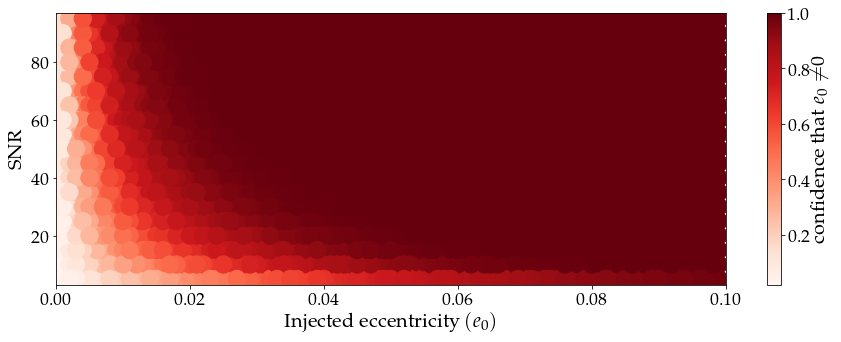

In [22]:
# Plotting 
  
SNR_inj = np.transpose(confidence.keys())[0]
ecc_inj = np.transpose(confidence.keys())[1]
conf = confidence.values()
    
plt.figure(figsize=(15,5))    
plt.scatter(ecc_inj, SNR_inj , c=conf, s=300, cmap='Reds')
plt.xlabel('Injected eccentricity $(e_0)$',fontsize=20)
plt.ylabel('SNR',fontsize=20)
plt.xlim(0,0.1)
plt.ylim(3,97)
cb = plt.colorbar()
cb.set_label(label=r'confidence that $e_0\neq$0',fontsize=20)
plt.savefig('confidence.png')
plt.show()